In [18]:
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import plotly as plt
import matplotlib.pyplot as plt
import keras
from PIL import Image
import numpy as np
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt



In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images.shape, train_labels.shape, test_images, test_labels.shape

((60000, 28, 28),
 (60000,),
 array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
    

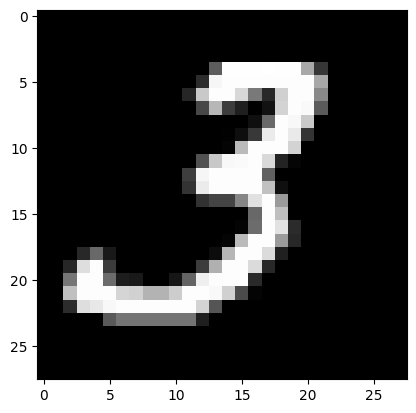

In [3]:
# Assuming train_images is a list or array of images
# and you want to display the image at index  327
plt.plot()
plt.imshow(train_images[327], cmap='gray')
plt.show()


In [4]:
train_labels[327]

3

In [5]:
# Normalize pixel 
train_images, test_images = train_images / 255, test_images/255

In [6]:
train_images.max(), train_images.min()

(1.0, 0.0)

In [7]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# Model

In [9]:
x_train = train_images 
y_train = train_labels

In [10]:
x_test = test_images
y_test = test_labels

In [11]:
model = Sequential([
    Conv2D(32, kernel_size=(3,  3), activation='relu', input_shape=(28,  28,  1)),
    MaxPooling2D(pool_size=(2,  2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=64)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)




Epoch 1/10


938/938 [==============================] - 11s 10ms/step - loss: 0.1836 - accuracy: 0.9463
Epoch 2/10
938/938 [==============================] - 9s 9ms/step - loss: 0.0573 - accuracy: 0.9832
Epoch 3/10
938/938 [==============================] - 9s 9ms/step - loss: 0.0376 - accuracy: 0.9885
Epoch 4/10
938/938 [==============================] - 9s 9ms/step - loss: 0.0264 - accuracy: 0.9918
Epoch 5/10
938/938 [==============================] - 9s 9ms/step - loss: 0.0176 - accuracy: 0.9944
Epoch 6/10
938/938 [==============================] - 9s 9ms/step - loss: 0.0131 - accuracy: 0.9959
Epoch 7/10
938/938 [==============================] - 9s 9ms/step - loss: 0.0107 - accuracy: 0.9966
Epoch 8/10
938/938 [==============================] - 9s 9ms/step - loss: 0.0084 - accuracy: 0.9973
Epoch 9/10
938/938 [==============================] - 9s 9ms/step - loss: 0.0058 - accuracy: 0.9982
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0521 - accuracy:

Prediction sur image singuliere

1/1 [==============================] - 0s 41ms/step


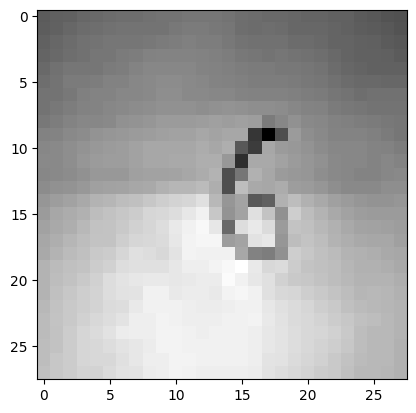

La prédiction est : 6


In [25]:
# je souhaite faire deux fonctions differente une pour drawing et une autre pour image 
# Charger l'image
def prediction_image_cam(image_path):
    # Charger l'image
    image = Image.open(image_path)
    # Redimensionne
    image = image.resize((28,  28)).convert('L')
    # Normaliser l'image
    image = np.array(image) /  255.0
    # Ajouter une dimension supplémentaire 
    image = np.expand_dims(image, axis=0)
    # Ajouter une autre dimension pour le canal pour que le modele est l'image dans le format qu'il veux
    image = np.expand_dims(image, axis=-1)
    # faire tourner la prediction
    prediction = model.predict(image)
    # Afficher l'image
    predicted_class = np.argmax(prediction)
    plt.imshow(image[0], cmap='gray')  
    plt.show()
    print(f"La prédiction est : {predicted_class}")


# appel de la fonction
image_path = 'image/6.png'
prediction_image_cam(image_path)



In [ ]:
from PIL import Image
import numpy as np

# Charger l'image
image_path = 'image/picture1.png'

image = Image.open(image_path)

# Redimensionner l'image et la convertir en niveaux de gris
image = image.resize((28,  28)).convert('L')

# Normaliser l'image (si nécessaire)
image = np.array(image) /  255.0

# Ajouter une dimension supplémentaire pour correspondre à la forme d'entrée attendue par le modèle
image = np.expand_dims(image, axis=0)

# Ajouter une autre dimension pour le canal (car le modèle attend une forme de (batch_size,  28,  28,  1))
image = np.expand_dims(image, axis=-1)

# Soumettre l'image au modèle pour obtenir la prédiction
prediction = model.predict(image)

# Obtenir l'index de la classe prédite
predicted_class = np.argmax(prediction)

print(f"La prédiction est : {predicted_class}")
